In [4]:
#importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [5]:
#importing data
data=pd.read_csv('train.csv')

In [6]:
#my implementation of splitting the dataset but in the code below i have shown how to use the same function provided by sklearn 
def split_train_set(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_size)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [7]:
#splitting the dataset train.csv into train and cross validation set using sklearn library function
from sklearn.model_selection import train_test_split
train_set,cross_set=train_test_split(data,test_size=0.1,random_state=42)
df=train_set
df_cross=cross_set

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460878 entries, 153527 to 121958
Data columns (total 11 columns):
ID                    460878 non-null int64
Day_No                460878 non-null int64
Course_ID             460878 non-null int64
Course_Domain         460878 non-null object
Course_Type           460878 non-null object
Short_Promotion       460878 non-null int64
Public_Holiday        460878 non-null int64
Long_Promotion        460878 non-null int64
User_Traffic          460878 non-null int64
Competition_Metric    459290 non-null float64
Sales                 460878 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 42.2+ MB


In [9]:
df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
153527,164328,104,181,Software Marketing,Course,0,0,0,13020,0.261,135
303438,324679,595,355,Development,Program,1,0,0,20832,0.091,200
250890,268471,561,294,Development,Course,1,0,1,19089,0.024,165
399375,427456,400,469,Development,Program,1,0,1,23583,0.117,220
116825,125046,40,138,Software Marketing,Program,0,0,1,13062,0.229,127


In [10]:
df.shape

(460878, 11)

In [11]:
#pre -processing the data

In [12]:
#competition metric has some missing values
df["Competition_Metric"].notnull()

153527    True
303438    True
250890    True
399375    True
116825    True
          ... 
259178    True
365838    True
131932    True
146867    True
121958    True
Name: Competition_Metric, Length: 460878, dtype: bool

In [13]:
#using imputer of sklearn to deal with missing values

In [14]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values=np.nan,strategy="median")#we wll be replacing the missing values by the median of that feature
data_temp=df.drop(["ID","Day_No","Course_ID","Course_Domain","Course_Type"],axis=1)
#applying imputer to the numeric values
imputer.fit(data_temp)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [15]:
#alternate method for replacing values 
median=df["Competition_Metric"].median()
df["Competition_Metric"].fillna(median)

153527    0.261
303438    0.091
250890    0.024
399375    0.117
116825    0.229
          ...  
259178    0.000
365838    0.172
131932    0.005
146867    0.019
121958    0.008
Name: Competition_Metric, Length: 460878, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460878 entries, 153527 to 121958
Data columns (total 11 columns):
ID                    460878 non-null int64
Day_No                460878 non-null int64
Course_ID             460878 non-null int64
Course_Domain         460878 non-null object
Course_Type           460878 non-null object
Short_Promotion       460878 non-null int64
Public_Holiday        460878 non-null int64
Long_Promotion        460878 non-null int64
User_Traffic          460878 non-null int64
Competition_Metric    459290 non-null float64
Sales                 460878 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 42.2+ MB


In [64]:
#df.head()

In [18]:
#cleaning data by removing the redundant columns
df=df.drop(["ID","Day_No","Course_ID"],axis=1)

In [19]:
df.head()

,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
153527,Software Marketing,Course,0,0,0,13020,0.261,135
303438,Development,Program,1,0,0,20832,0.091,200
250890,Development,Course,1,0,1,19089,0.024,165
399375,Development,Program,1,0,1,23583,0.117,220
116825,Software Marketing,Program,0,0,1,13062,0.229,127


In [20]:
df['Course_Domain'].describe()
df['Course_Domain'].unique()


array(['Software Marketing', 'Development', 'Finance & Accounting',
       'Business'], dtype=object)

In [21]:
df.describe()

,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,460878.000000,460878.000000,460878.000000,460878.000000,459290.000000,460878.000000
mean,0.380313,0.031618,0.488637,15375.395792,0.073387,120.803592
std,0.485464,0.174981,0.499871,7726.555659,0.100235,54.345767
min,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,1.000000,1.000000,1.000000,97335.000000,0.768000,682.000000


In [65]:
#df.shape[0]

In [23]:
df['Course_Domain'].value_counts()

Development             237933
Software Marketing      149454
Finance & Accounting     69514
Business                  3977
Name: Course_Domain, dtype: int64

In [24]:
df['Course_Type'].value_counts()
#df['Course_Type'].unique()


Course     236689
Program    222612
Degree       1577
Name: Course_Type, dtype: int64

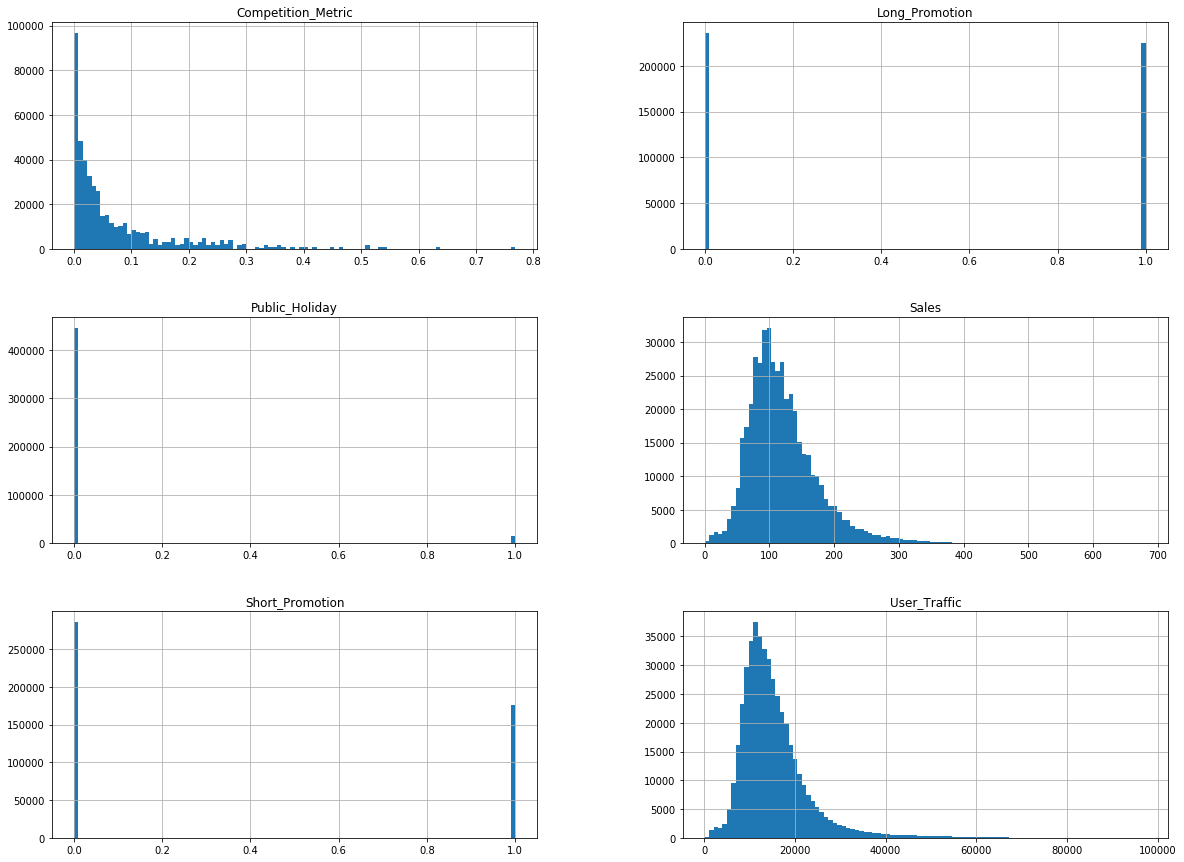

In [25]:
df.hist(bins=100,figsize=(20,15))
plt.show()

In [26]:
#this shows that user_traffic,competition_metric and sales colums can be used for data analysis

In [27]:
corr_matrix=df.corr()

In [28]:
corr_matrix["Sales"].sort_values(ascending=False)

Sales                 1.000000
User_Traffic          0.830030
Short_Promotion       0.367048
Competition_Metric   -0.022415
Long_Promotion       -0.109504
Public_Holiday       -0.135380
Name: Sales, dtype: float64

In [29]:
#conclusion 
#from correlation matrix is that user_traffic is in correlation with sales,
#and short promotio is also correlated to sales

In [30]:
#preprocessing the categorail data before sending to ml algorithm 
#one vs all method is used in one hot encoding
#converting categorial data to one hot encoding
from sklearn.preprocessing import LabelBinarizer

In [31]:
df_cat=df["Course_Domain"]
encoder=LabelBinarizer()
df_1hot=encoder.fit_transform(df_cat)
print(encoder.classes_)
df_1hot

['Business' 'Development' 'Finance & Accounting' 'Software Marketing']


array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [32]:
df_cat=df["Course_Type"]
encoder=LabelBinarizer()
df_2hot=encoder.fit_transform(df_cat)
print(encoder.classes_)
df_2hot

['Course' 'Degree' 'Program']


array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [33]:
#Scaling the data so that during gradient descent the process is not slow  in reaching the optimum
#i will be using sklearn pipeline to do scaling

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
df1=df[df.columns[0:5]]#we dont have to apply scaling on this data
df2=df[df.columns[5:]]#we have to apply scaling on this data
df2.head()

,User_Traffic,Competition_Metric,Sales
153527,13020,0.261,135
303438,20832,0.091,200
250890,19089,0.024,165
399375,23583,0.117,220
116825,13062,0.229,127


In [36]:
num_pipeline=Pipeline([
    ('std_scaler',StandardScaler())
])
df2_trans=num_pipeline.fit_transform(df2)
df2_trans#contains the scaled values of the last three columns

array([[-0.30484455,  1.87174162,  0.26122408],
       [ 0.70621508,  0.17572253,  1.45727069],
       [ 0.4806292 , -0.49270852,  0.81324559],
       ...,
       [ 0.27678653, -0.68226359,  0.26122408],
       [-1.23708501, -0.54259143, -1.39484045],
       [-0.32658776, -0.65233385,  0.11401835]])

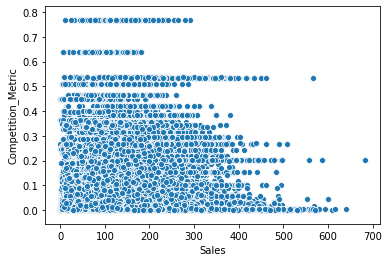

In [37]:
sns.scatterplot(x=df2["Sales"],y=df2["Competition_Metric"])

In [38]:
#the above plot shows that there is no meaningful relation between sales and competiton 

In [39]:
course_domain_mod=np.zeros(df.shape[0])
course_domain_mod.shape

(460878,)

In [40]:
#course_domain_mod.reshape(512087,1)


In [41]:
df.loc[:,"Course_Domain_mod"]=course_domain_mod
df["Course_Domain_mod"].shape

(460878,)

In [46]:
#target=df["Course_Domain"]
#for i,val in enumerate(target):

#    if(val=='Development'): df["Course_Domain_mod"][i]=1;
#    elif(val=='Software Marketing'):df["Course_Domain_mod"][i]=2;
#    elif(val=='Finance & Accounting'):df["Course_Domain_mod"][i]=3;
#    elif(val=='Business'):df["Course_Domain_mod"][i]=4;
    

In [47]:
i

17029

In [48]:
#df["Course_Domain_mod"].value_counts()
#df["Course_Domain_mod"].shape

In [49]:
df["Course_Domain_mod"].describe()

count    462591.000000
mean          0.060704
std           0.343092
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Course_Domain_mod, dtype: float64

In [50]:
#df["Course_Domain"].value_counts()

In [51]:
#df.head()

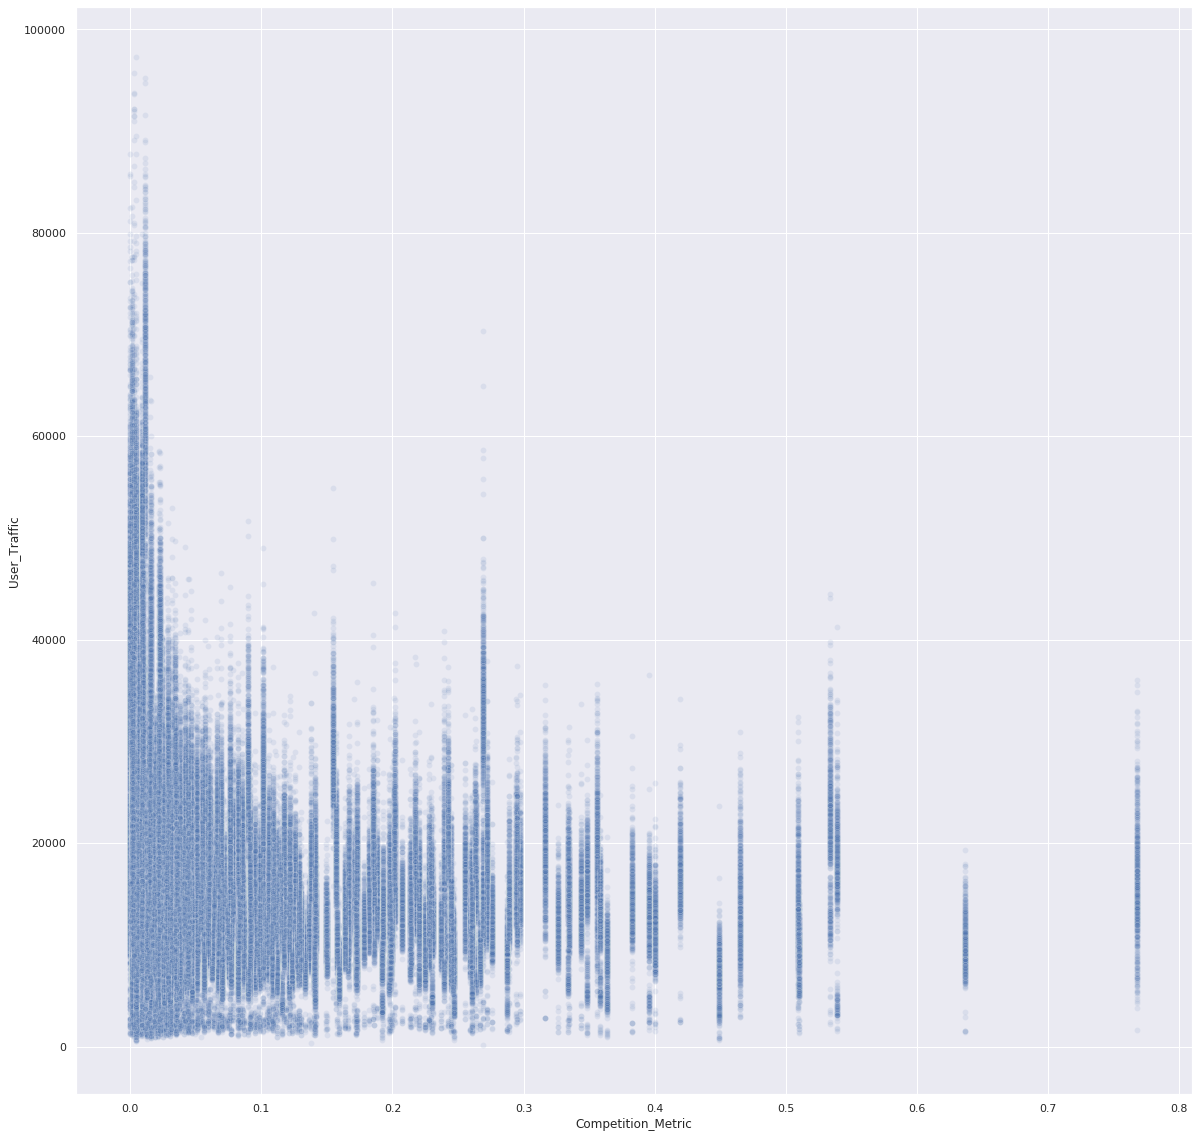

In [68]:
sns.scatterplot(x=df["Competition_Metric"],y=df["User_Traffic"],alpha=0.1)

In [53]:
#from the above plot it is clear that 

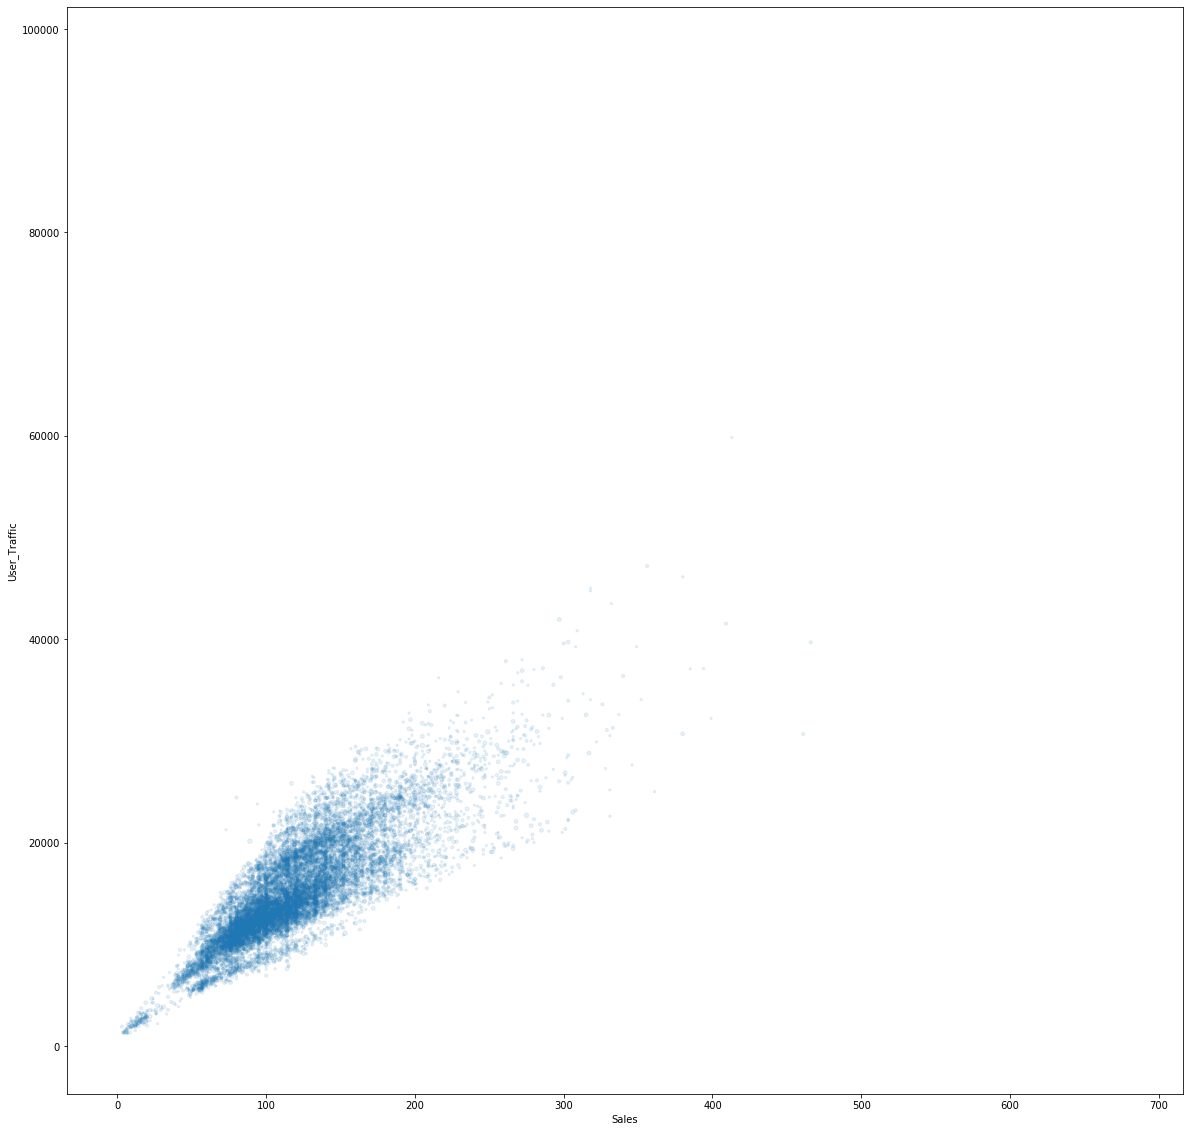

In [54]:
df.plot(kind="scatter",x="Sales",y="User_Traffic",alpha=0.1,s=df["Course_Domain_mod"]*5,figsize=(20,20))


In [55]:
sns.set(rc={'figure.figsize':(20,20)})

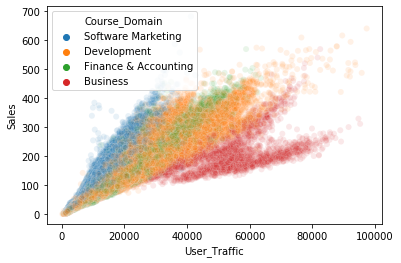

In [43]:
#inferences from this plot
#business courses have less sales/user_traffic which indicates that users easily dont buy business courses as they tend to be costly and less useful
#software marketing has highest sales/user_traffic which indicates that these are very helpful in people's career and they tend to buy them easily
#this plot also indicates that highest no.of people buy/study development courses as they tend to be easier for everyone
sns.scatterplot(x=df["User_Traffic"],y=df["Sales"],hue=df["Course_Domain"],alpha=0.1)

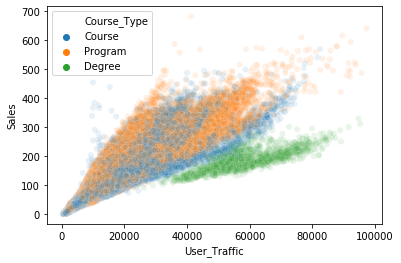

In [44]:
#inference from this plot is that 
#courses have more sales/user_traffic which means that most users buy a course who see the course,which indicates that they are cheaper and hence preffered by people
#degree has less sales/user_traffic which indicates that most users dont tend to buy degree easily upon seeing it as they are costly and time consuming
sns.scatterplot(x=df["User_Traffic"],y=df["Sales"],hue=df["Course_Type"],alpha=0.1)

In [58]:
#the above plot also shows that user traffic and sales are not correlatd much for business domain

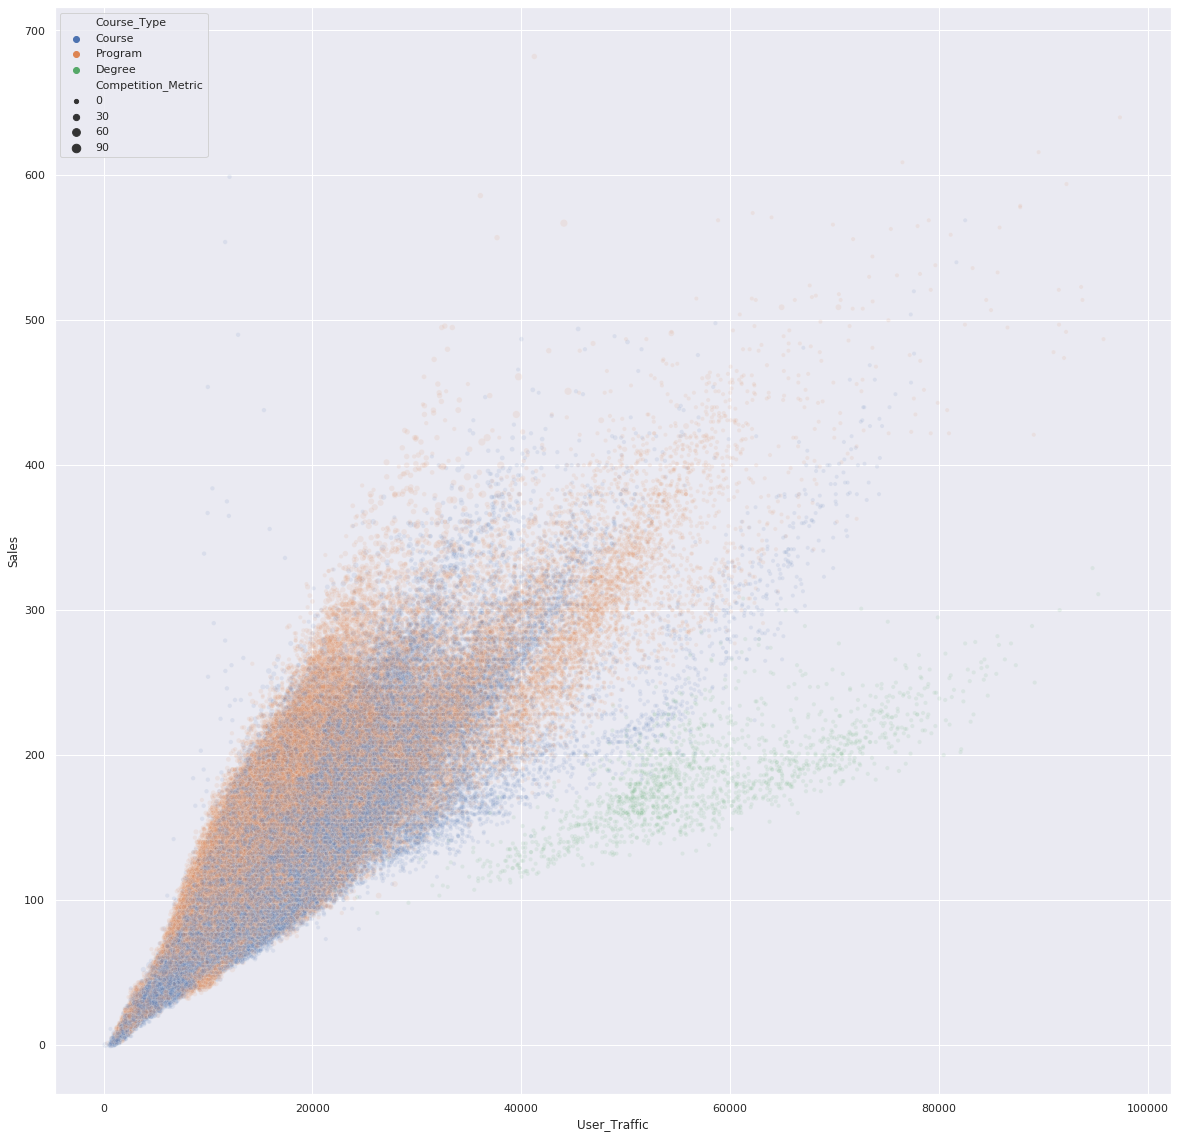

In [62]:
sns.scatterplot(x=df["User_Traffic"],y=df["Sales"],size=df["Competition_Metric"]*100,alpha=0.1,hue=df["Course_Type"])

In [ ]:
#we can also declare a new feature based on the slope of the above graph

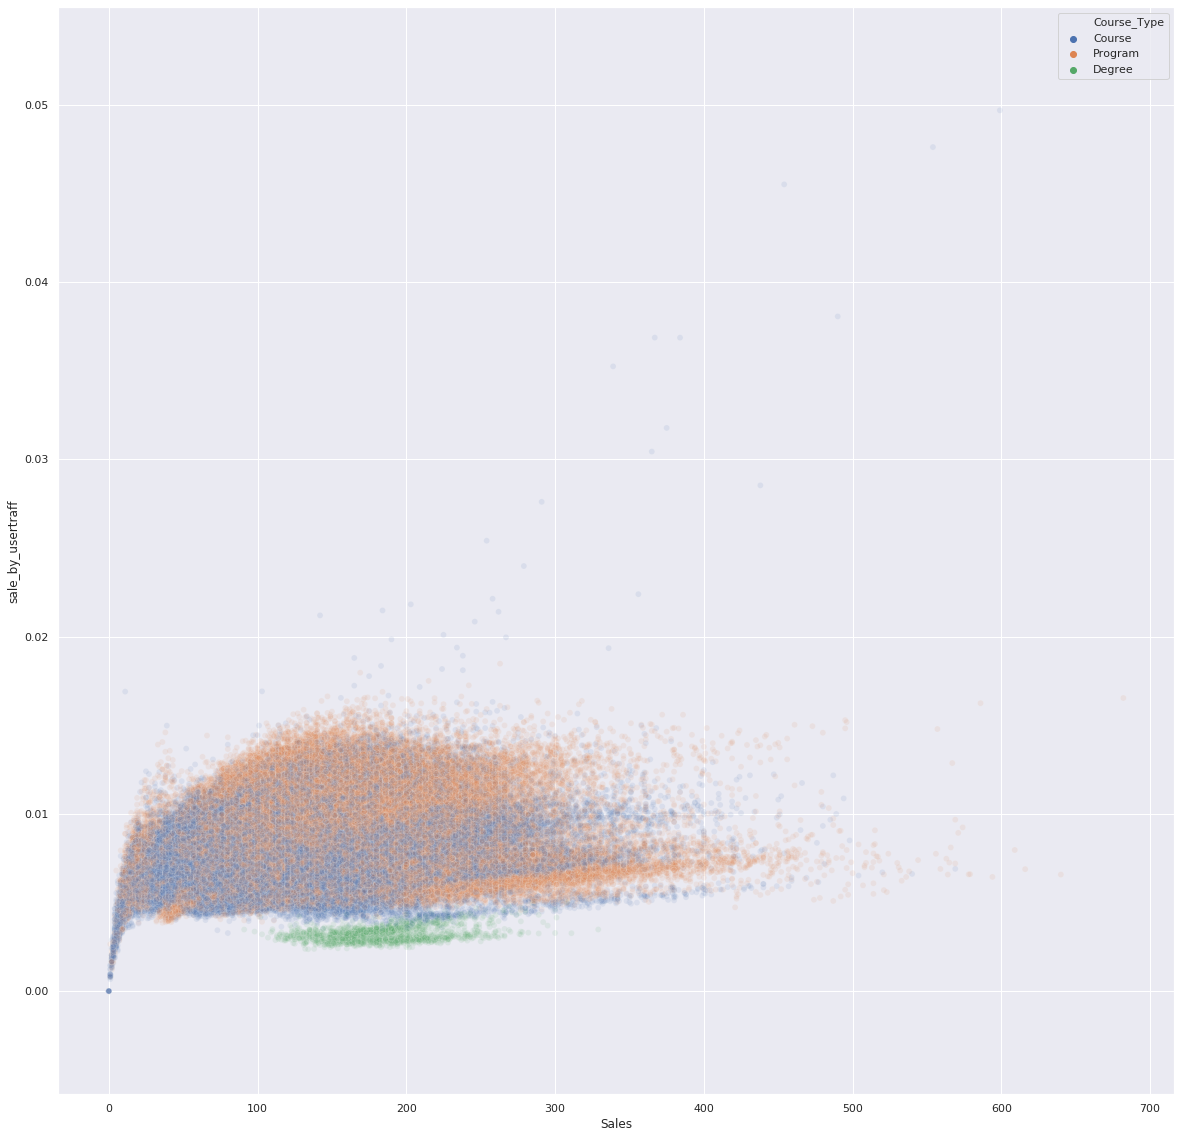

In [66]:
#new feature
df["sale_by_usertraff"]=df["Sales"]/df["User_Traffic"]
sns.scatterplot(x=df["Sales"],y=df["sale_by_usertraff"],hue=df["Course_Type"],alpha=0.1)

In [ ]:
a=

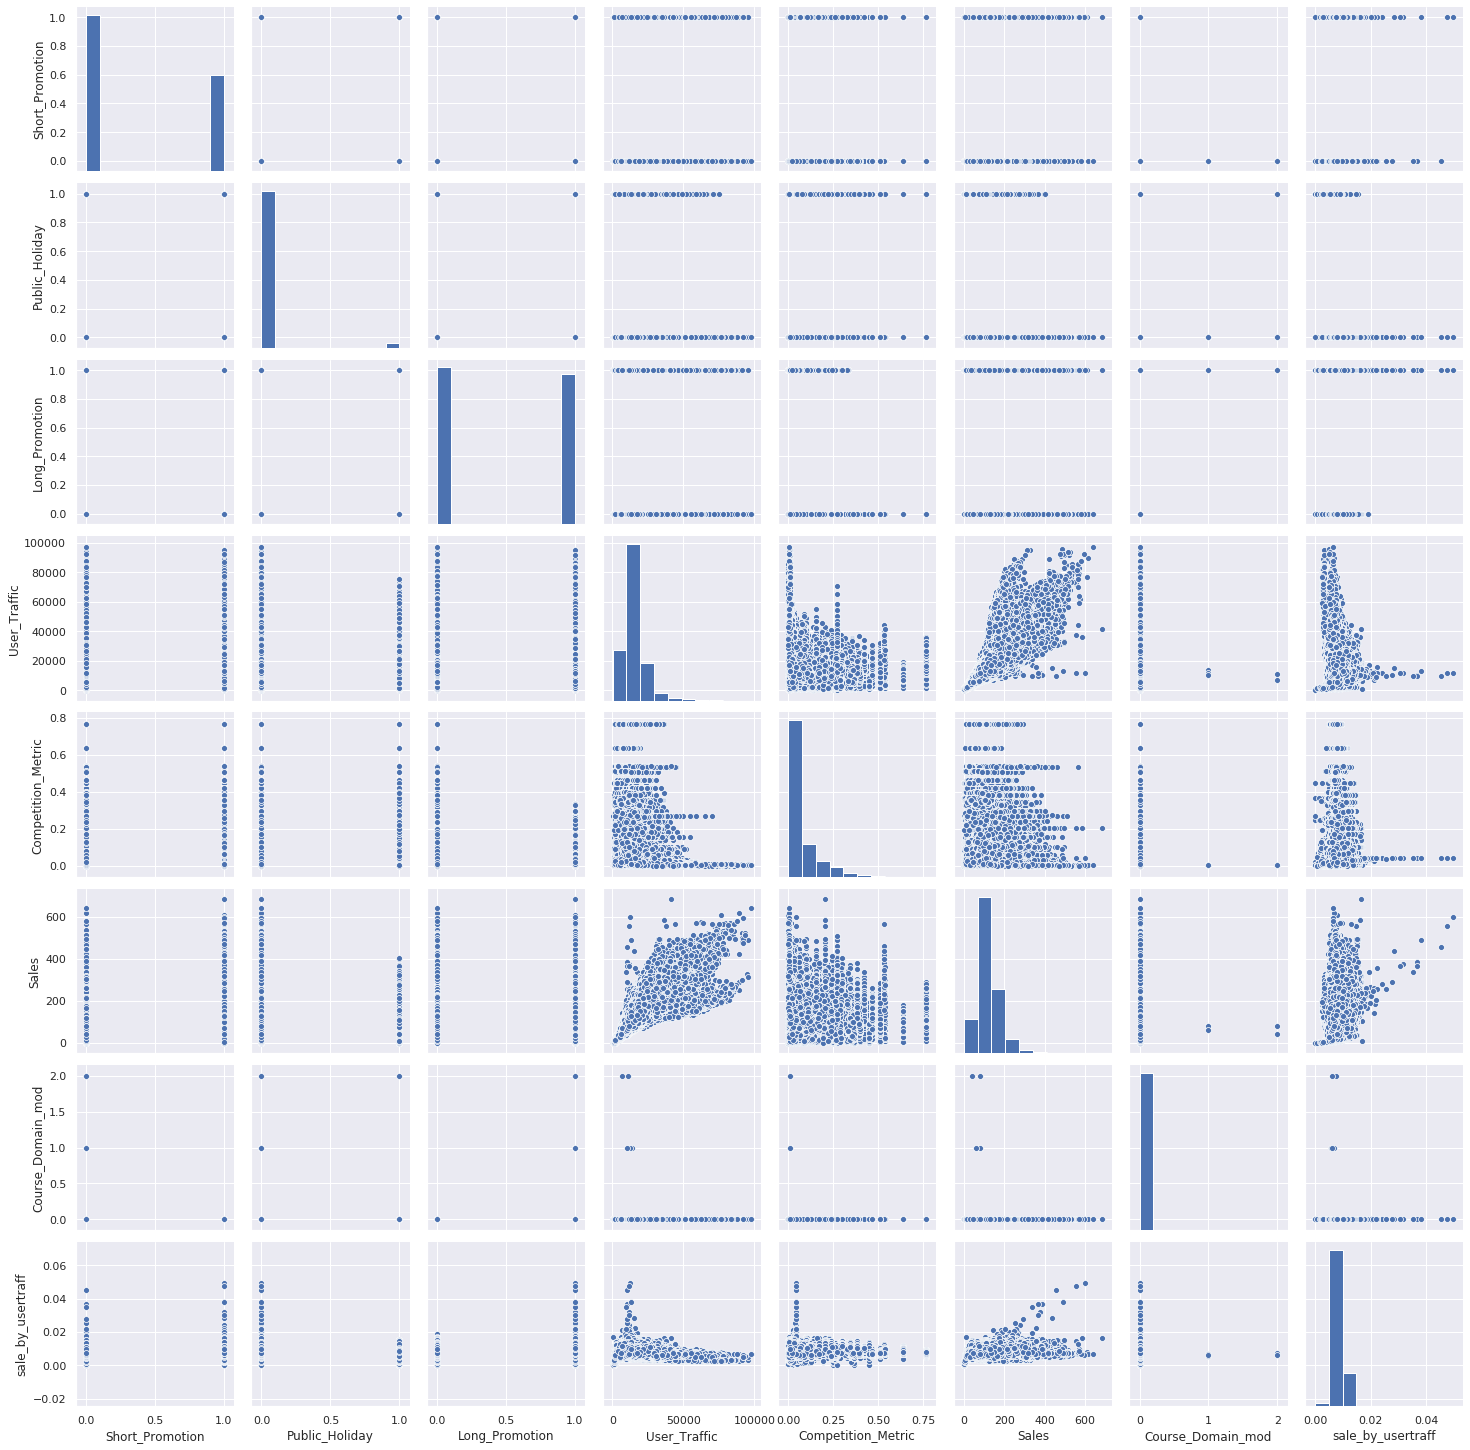

In [63]:
sns.pairplot(df)

In [ ]:
#from all this analysis it is clear that the features selectd for the model should be sale and user_traffic

In [ ]:
#now we willl be training the model to predict sales from user_traffic using linear regression as 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#a=df["User_Traffic"].reshape(-1,1)

In [ ]:
#training the linearRgression model on the data
lin_reg=LinearRegression()
lin_reg.fit(df["User_Traffic"].values.reshape(-1,1),df["Sales"].values.reshape(-1,1))

In [ ]:
df_cross.head()

In [ ]:
#predicting the data using the trained model
print("predictions\n",lin_reg.predict(df_cross["User_Traffic"][0:10].values.reshape(-1,1)))

In [ ]:
#actual values stored
print("actual\n",df_cross["Sales"][0:10].values)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#calculating and displaying the squared error of the model
prd=lin_reg.predict(df_cross["User_Traffic"][0:10].values.reshape(-1,1))
lin_mse=mean_squared_error(prd,df_cross["Sales"][0:10].values)
lin_rmse=np.sqrt(lin_mse)
lin_rmse
                    